In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_PingAn = pd.read_csv('df_PingAn_Clean.csv', index_col=0)
df_Wanke = pd.read_csv('df_WanKe_Clean.csv', index_col=0)
df_ZhongXing = pd.read_csv('df_ZhongXing_Clean.csv', index_col=0)
df_ChangCheng = pd.read_csv('df_ChangCheng_Clean.csv', index_col=0)
df_HuaQiao = pd.read_csv('df_HuaQiao_Clean.csv', index_col=0)
df_TCL = pd.read_csv('df_TCL_Clean.csv', index_col=0)
df_ZhongLian = pd.read_csv('df_ZhongLian_Clean.csv', index_col=0)
df_ShenWan = pd.read_csv('df_ShenWan_Clean.csv', index_col=0)
df_MeiDi = pd.read_csv('df_MeiDi_Clean.csv', index_col=0)
df_WeiChai = pd.read_csv('df_WeiChai_Clean.csv', index_col=0)

# 价格

In [33]:
def rate_features(df):
    df.index = pd.to_datetime(df.index)
    df_tmp = df.copy()
    df_day_first = df_tmp.resample('D').last()
    
    O1 = df_day_first['price'][0]
    O2 = df_day_first['price'][1]
    O3 = df_day_first['price'][2]
    O4 = df_day_first['price'][3]
    O5 = df_day_first['price'][4]
    
    D1 = df_tmp[(df_tmp.index >= '2021-08-23')&(df_tmp.index < '2021-08-24')]
    D2 = df_tmp[(df_tmp.index >= '2021-08-24')&(df_tmp.index < '2021-08-25')]
    D3 = df_tmp[(df_tmp.index >= '2021-08-25')&(df_tmp.index < '2021-08-26')]
    D4 = df_tmp[(df_tmp.index >= '2021-08-26')&(df_tmp.index < '2021-08-27')]
    D5 = df_tmp[(df_tmp.index >= '2021-08-27')&(df_tmp.index < '2021-08-28')]
    
    D1['Ratio'] = (D1['price'])/O1
    D2['Ratio'] = (D2['price'])/O2
    D3['Ratio'] = (D3['price'])/O3
    D4['Ratio'] = (D4['price'])/O4
    D5['Ratio'] = (D5['price'])/O5
    
    #D1['Ratio'] = (D1['price']-O1)/O1
    #D2['Ratio'] = (D2['price']-O2)/O2
    #D3['Ratio'] = (D3['price']-O3)/O3
    #D4['Ratio'] = (D4['price']-O4)/O4
    #D5['Ratio'] = (D5['price']-O5)/O5
    
    df_out = pd.concat([D1,D2,D3,D4,D5])
    
    return df_out

In [41]:
def rate1_features(df):
    df.index = pd.to_datetime(df.index)
    df_tmp = df.copy()
    
    Op = df_tmp['price'][0]
    
    df_tmp['Ratio'] = df_tmp['price']/Op
    #df_tmp.drop(['AgoPrice'])
    
    #df_out = pd.concat([D1,D2,D3,D4,D5])
    
    return df_tmp

In [42]:
df_PingAn_rate = rate1_features(df_PingAn)
df_Wanke_rate = rate1_features(df_Wanke)
df_ZhongXing_rate = rate1_features(df_ZhongXing)
df_ChangCheng_rate = rate1_features(df_ChangCheng)
df_HuaQiao_rate = rate1_features(df_HuaQiao)
df_TCL_rate = rate1_features(df_TCL)
df_ZhongLian_rate = rate1_features(df_ZhongLian)
df_ShenWan_rate = rate1_features(df_ShenWan)
df_MeiDi_rate = rate1_features(df_MeiDi)
df_WeiChai_rate = rate1_features(df_WeiChai)

In [34]:
df_PingAn_rate = rate_features(df_PingAn)
df_Wanke_rate = rate_features(df_Wanke)
df_ZhongXing_rate = rate_features(df_ZhongXing)
df_ChangCheng_rate = rate_features(df_ChangCheng)
df_HuaQiao_rate = rate_features(df_HuaQiao)
df_TCL_rate = rate_features(df_TCL)
df_ZhongLian_rate = rate_features(df_ZhongLian)
df_ShenWan_rate = rate_features(df_ShenWan)
df_MeiDi_rate = rate_features(df_MeiDi)
df_WeiChai_rate = rate_features(df_WeiChai)

<ipython-input-33-3396c0f09e53>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['Ratio'] = (D1['price'])/O1
<ipython-input-33-3396c0f09e53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D2['Ratio'] = (D2['price'])/O2
<ipython-input-33-3396c0f09e53>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [43]:
df_tmp = df_PingAn_rate[['Ratio']]
df_li = [df_Wanke_rate, df_ZhongXing_rate, df_ChangCheng_rate, df_HuaQiao_rate, df_TCL_rate,
        df_ZhongLian_rate, df_ShenWan_rate, df_MeiDi_rate, df_WeiChai_rate]
df_name = ['_万科A', '_中兴通讯', '_中国长城', '_华侨城A', '_TCL科技',
        '_中联重科', '_申万宏源', '_美的集团', '_潍柴动力']

for df, name in zip(df_li, df_name):
    df_tmp = df_tmp.join(df[['Ratio']], rsuffix=name)

In [44]:
df_tmp = df_tmp.rename(columns={'Ratio':'Ratio_平安银行'})

In [18]:
df_tmp = df_tmp.resample('30T').mean()

In [45]:
df_mianban = df_tmp.dropna()

# 开始绘图

In [46]:
df_mianban

,Ratio_平安银行,Ratio_万科A,Ratio_中兴通讯,Ratio_中国长城,Ratio_华侨城A,Ratio_TCL科技,Ratio_中联重科,Ratio_申万宏源,Ratio_美的集团,Ratio_潍柴动力
time_tick,,,,,,,,,,
2021-08-23 09:30:03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-08-23 09:30:06,0.999487,1.000877,1.000000,1.000641,1.000000,1.001395,1.001232,1.002141,1.002927,1.000000
2021-08-23 09:30:09,1.002053,0.999562,0.998584,1.002562,1.004225,1.001395,1.001232,1.002141,1.003206,1.001562
2021-08-23 09:30:12,1.003080,1.000000,0.997734,0.999359,1.001408,1.001395,1.002463,1.002141,1.005575,1.003644
2021-08-23 09:30:15,1.005647,1.000877,0.998017,1.001922,1.004225,1.001395,1.002463,1.002141,1.007108,1.005206
...,...,...,...,...,...,...,...,...,...,...
2021-08-27 14:56:42,0.943532,0.916265,0.975637,0.933376,0.950704,0.998605,0.981527,0.995717,0.945366,1.056221
2021-08-27 14:56:48,0.944045,0.915826,0.975637,0.933376,0.950704,0.998605,0.980296,0.995717,0.945226,1.056741
2021-08-27 14:56:51,0.944045,0.915826,0.975637,0.933376,0.949296,0.998605,0.979064,0.995717,0.945226,1.056221


In [47]:
#df_mianban.plot(y='price', figsize=(20,8),fontsize = 12)

y_label = ['Ratio_平安银行','Ratio_万科A', 'Ratio_中兴通讯', 'Ratio_中国长城', 'Ratio_华侨城A', 'Ratio_TCL科技',
        'Ratio_中联重科', 'Ratio_申万宏源', 'Ratio_美的集团', 'Ratio_潍柴动力']

df_mianban.reset_index(inplace=True)


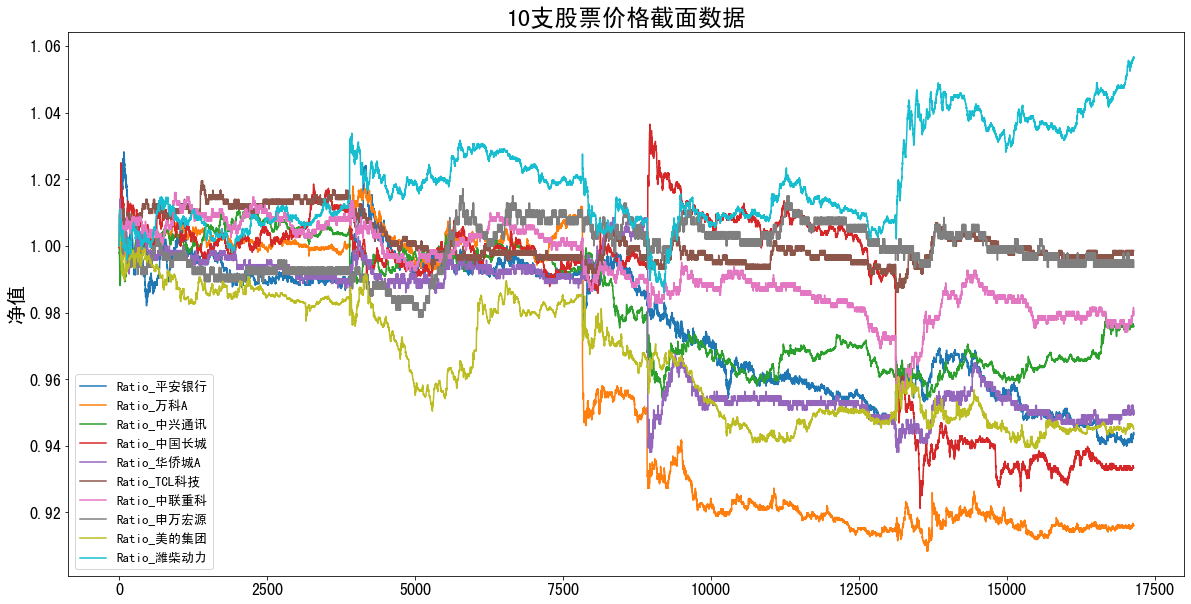

In [54]:
ax1 = df_mianban.plot(y=y_label, figsize=(20,10),fontsize = 16)

ax1.set_title('10支股票价格截面数据',fontsize = 24)
ax1.set_ylabel('净值',fontsize=20)
ax1.legend(fontsize=13)

plt.savefig('10支股票价格增长情况.jpg')
plt.show()

# 成交量

In [76]:
def volume_features(df):
    df.index = pd.to_datetime(df.index)
    df_tmp = df.copy()
    
    df_tmp = df_tmp[(df_tmp.index >= '2021-08-23')&(df_tmp.index < '2021-08-24')]
    df_tmp['log_volume'] = np.log(df_tmp['volume'])
    
    return df_tmp

In [77]:
df_PingAn_volume = volume_features(df_PingAn)
df_Wanke_volume = volume_features(df_Wanke)
df_ZhongXing_volume = volume_features(df_ZhongXing)
df_ChangCheng_volume = volume_features(df_ChangCheng)
df_HuaQiao_volume = volume_features(df_HuaQiao)
df_TCL_volume = volume_features(df_TCL)
df_ZhongLian_volume = volume_features(df_ZhongLian)
df_ShenWan_volume = volume_features(df_ShenWan)
df_MeiDi_volume = volume_features(df_MeiDi)
df_WeiChai_volume = volume_features(df_WeiChai)

In [78]:
df_tmp = df_PingAn_volume[['log_volume']]
df_li = [df_Wanke_volume, df_ZhongXing_volume, df_ChangCheng_volume, df_HuaQiao_volume, df_TCL_volume,
        df_ZhongLian_volume, df_ShenWan_volume, df_MeiDi_volume, df_WeiChai_volume]
df_name = ['_万科A', '_中兴通讯', '_中国长城', '_华侨城A', '_TCL科技',
        '_中联重科', '_申万宏源', '_美的集团', '_潍柴动力']

for df, name in zip(df_li, df_name):
    df_tmp = df_tmp.join(df[['log_volume']], rsuffix=name)
    
df_tmp = df_tmp.rename(columns={'log_volume':'log_volume_平安银行'})
#df_tmp = df_tmp.resample('D').mean()

In [79]:
df_mianban = df_tmp.dropna()

In [80]:
df_mianban

,log_volume_平安银行,log_volume_万科A,log_volume_中兴通讯,log_volume_中国长城,log_volume_华侨城A,log_volume_TCL科技,log_volume_中联重科,log_volume_申万宏源,log_volume_美的集团,log_volume_潍柴动力
time_tick,,,,,,,,,,
2021-08-23 09:30:03,9.630037,8.157370,8.332789,8.712431,7.640123,11.616727,8.553718,9.228475,7.443078,9.572202
2021-08-23 09:30:06,9.865007,8.446556,8.732143,9.052282,8.199189,11.867462,8.835210,9.323401,7.558517,9.681156
2021-08-23 09:30:09,9.908774,8.518592,8.748305,9.123365,8.391176,11.885468,8.924257,9.382780,7.606885,9.768641
2021-08-23 09:30:12,9.955653,8.585599,8.765146,9.163458,8.459776,12.086083,9.018695,9.396571,7.708411,9.821681
2021-08-23 09:30:15,10.028710,8.628913,8.823501,9.182558,8.494129,12.106042,9.100302,9.408125,7.734121,9.919164
...,...,...,...,...,...,...,...,...,...,...
2021-08-23 14:56:42,13.985614,12.913865,13.092145,13.330957,12.299258,14.620432,13.726284,13.269379,12.384528,13.741416
2021-08-23 14:56:48,13.985874,12.914345,13.092889,13.331595,12.299873,14.620984,13.727033,13.269648,12.385151,13.743068
2021-08-23 14:56:50,13.986292,12.914502,13.093412,13.331990,12.303943,14.621915,13.728106,13.270482,12.386050,13.744748


In [81]:
y_label = ['log_volume_TCL科技','log_volume_平安银行','log_volume_潍柴动力','log_volume_中联重科',
            'log_volume_中国长城','log_volume_申万宏源', 'log_volume_万科A',
           'log_volume_中兴通讯', 'log_volume_美的集团', 'log_volume_华侨城A' ]

#df_mianban.reset_index(inplace=True)

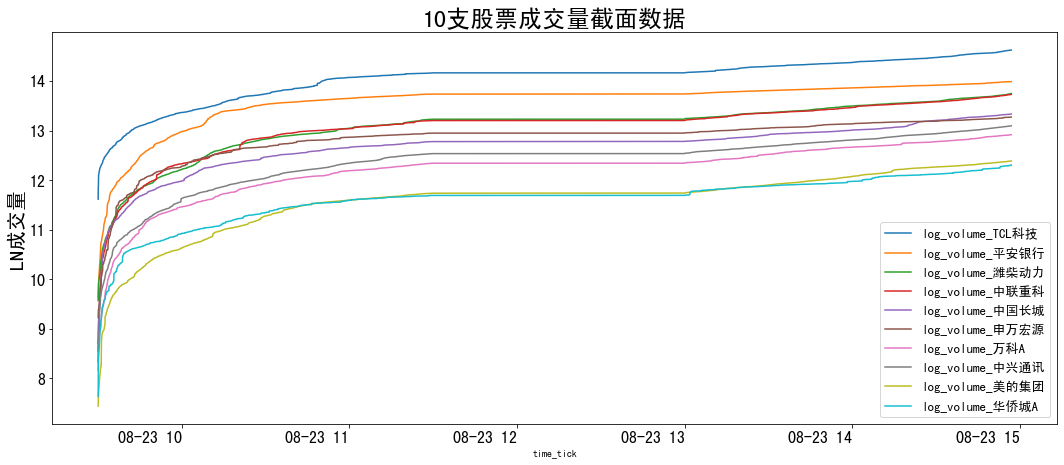

In [84]:
ax2 = df_mianban.plot(y=y_label, figsize=(18,8),fontsize = 16, rot=0)

ax2.set_title('10支股票成交量截面数据',fontsize = 24)
ax2.set_ylabel('LN成交量',fontsize=20)
ax2.legend(fontsize=13)

plt.savefig('10支股票成交量对比.jpg')
plt.show()